In [9]:
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

In [15]:
from tensorflow.keras import layers
layer = layers.Dense(32, input_shape=(784,)) # 첫번째 차원이 784 이고 출력은 32

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10)) # 출력만 10

- 네트워크 구조는 가설 공간을 정의한다. 
- 가능성이 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것.
- 네트워크 구조를 선택함으로써 가설 공간을 제한.

### 손실 함수의 선택
- 이진 분류 : binary crossentropy
- 여러 분류 : categorical crossentropy
- 회귀 문제 : 평균 제곱 오차
- 시퀀스 : Connection Temporal Classification

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [27]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrix=['accuracy'])
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

In [29]:
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

In [37]:
import keras
keras.__version__

'2.3.1'

In [38]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [43]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [45]:
max([max(sequence) for sequence in train_data])

9999

In [60]:
from IPython import display

word_index = imdb.get_word_index()
print(type(word_index), len(word_index))
#display.display(word_index)

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 단어 인덱스에 3을 더한 값으로 저장되어 있다. 
print(reverse_word_index.get(14 - 3))
print(reverse_word_index.get(22 - 3))
print(reverse_word_index.get(16 - 3))

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

<class 'dict'> 88584
this
film
was
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised fo

In [71]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [87]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [88]:
y_train = np.asarray(train_labels).astype('float32') # 긍정 1.0 부정은 0.0 으로 변경
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0], y_train[1], y_train[2], y_train[3])

1.0 0.0 0.0 1.0


In [89]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 활성화 함수를 사용하여 선형 가설 공간을 비선형 가설 공간으로 변경한다.

In [83]:
model.compile(
  optimizer='rmsprop', 
  loss='binary_crossentropy',
  metrics=['accuracy'])

from keras import optimizers

model.compile(
  optimizer=optimizers.RMSprop(lr=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy'])

from keras import losses
from keras import metrics

model.compile(
  optimizer=optimizers.RMSprop(lr=0.001),
  loss=losses.binary_crossentropy, 
  metrics=[metrics.binary_accuracy])

In [92]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [93]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(
  partial_x_train, 
  partial_y_train, 
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5060 - acc: 0.7989 - val_loss: 0.3907 - val_acc: 0.8631
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.3063 - acc: 0.9029 - val_loss: 0.3156 - val_acc: 0.8794
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2263 - acc: 0.9269 - val_loss: 0.2795 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1795 - acc: 0.9425 - val_loss: 0.2769 - val_acc: 0.8900
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1476 - acc: 0.9514 - val_loss: 0.3031 - val_acc: 0.8824
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1209 - acc: 0.9628 - val_loss: 0.2940 - val_acc: 0.8843
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0998 - acc: 0.9707 - val_loss: 0.3370 - 

In [94]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


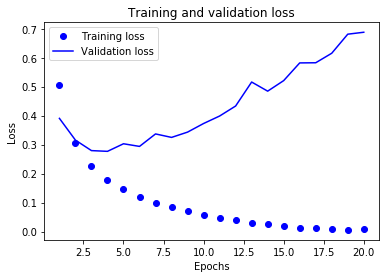

In [95]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# bo 는 파란색 점을 의미
plt.plot(epochs, loss, 'bo', label='Training loss')
# b 는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

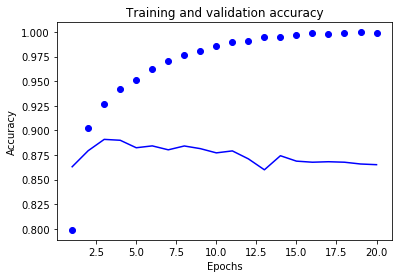

In [97]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [109]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

predictions = model.predict(x_test)
print(predictions)

Epoch 1/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.4627 - accuracy: 0.8094
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2621 - accuracy: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.1998 - accuracy: 0.9312
Epoch 4/4
25000/25000 [==============================] - 3s 115us/step
[0.29139023963928223, 0.883840024471283]
[[0.17957765]
 [0.9993942 ]
 [0.8333128 ]
 ...
 [0.105611  ]
 [0.06435713]
 [0.6784449 ]]


# 뉴스 기사 분류

In [110]:
import keras
keras.__version__

'2.3.1'